#                            Лабораторна робота №1
## з дисципліни «Математичне моделювання економічних та екологічних процесів»
### Варіант №11


## 1. Підбір функцій попиту та пропозиції

Зчитування варіанта з файлу ".csv". Перший стовпчик - ціна, другий - попит, третій - пропозиція.

In [1]:
from numpy import genfromtxt
from tabulate import tabulate
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

my_data = genfromtxt('/home/charmer/Documents/my_var.csv', delimiter=',')
print(my_data)

[[  4.   76.2   7.1]
 [  4.6  71.4  10.2]
 [  5.   64.7  26.4]
 [  6.   61.5  30.1]
 [  6.7  53.9  46.9]
 [  8.   43.6  50.6]
 [  8.9  40.1  51.9]
 [  9.6  34.6  69. ]
 [ 11.1  35.1  73.4]
 [ 11.9  30.2  80.1]
 [ 12.7  22.1  90.5]]


In [2]:
price = my_data[:, 0]
demand = my_data[:, 1]
supply = my_data[:, 2]

Шукатимемо функції попиту та пропозиції у вигляді $$ Q = \frac{a}{p ^ b} $$ або $$ Q = a * p^2 + b * p + c $$ 
Зауважимо, що знайдені параметри мають задовольняти закон попиту та пропозиції відповідно. 
Закон попиту — величина (об'єм) попиту зменшується у міру збільшення ціни товару. Математично це означає, що між величиною попиту і ціною існує обернено пропорційна залежність.
Закон пропозиції – загальний економічний закон, згідно з яким за незмінюваності всіх інших параметрів між змінами цін і кількістю товарів та послуг, які пропонуються підприємствами на ринку, існує прямо пропорційна залежність.

In [3]:
def fun_1(x, a, b):
    return a * np.exp(x * b)

In [4]:
def fun_2(x, a, b, c):
    return a * (x ** 2) + b * x + c

In [5]:
def fun_3(x, a, b):
    return a * np.log(b * x)

Text(0,0.5,'price')

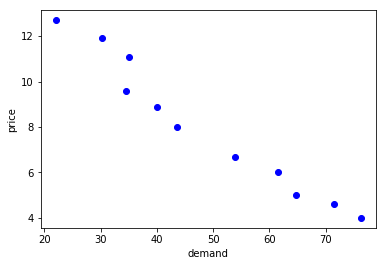

In [6]:
plt.plot(demand, price, 'bo', label='data')
plt.xlabel('demand')
plt.ylabel('price')

[ 126.59937248   -0.12751038]


Text(0,0.5,'price')

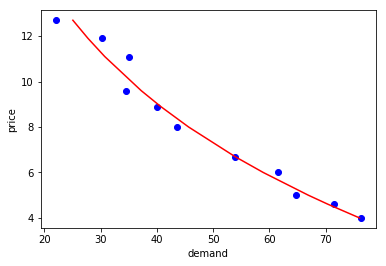

In [7]:
popt1, pcov1 = curve_fit(fun_1, price, demand)
print (popt1)
plt.plot(demand, price, 'bo', label='data')
plt.plot(fun_1(price, *popt1), price, 'r-')
plt.xlabel('demand')
plt.ylabel('price')

[   0.3823233   -12.14208425  118.21671722]


Text(0,0.5,'price')

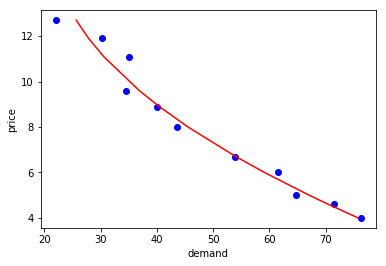

In [8]:
popt2, pcov2 = curve_fit(fun_2, price, demand)
print (popt2)
plt.plot(demand, price, 'bo', label='data')
plt.plot(fun_2(price, *popt2), price, 'r-')
plt.xlabel('demand')
plt.ylabel('price')

Text(0,0.5,'price')

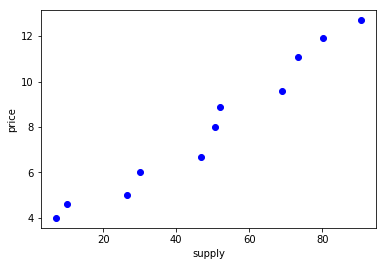

In [9]:
plt.plot(supply, price, 'bo', label='data')
plt.xlabel('supply')
plt.ylabel('price')

[ 11.47046242   0.16684457]


Text(0,0.5,'price')

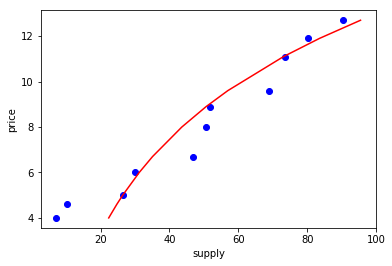

In [10]:
popt1, pcov1 = curve_fit(fun_1, price, supply)
print (popt1)
plt.plot(supply, price, 'bo', label='data')
plt.plot(fun_1(price, *popt1), price, 'r-')
plt.xlabel('supply')
plt.ylabel('price')

[ 68.91653223   0.27037079]


/home/charmer/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0,0.5,'price')

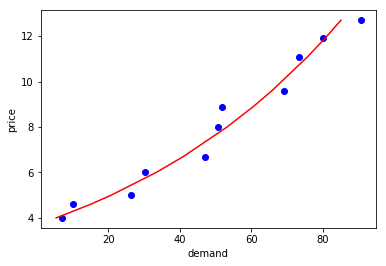

In [11]:
popt2, pcov2 = curve_fit(fun_3, price, supply)
print (popt2)
plt.plot(supply, price, 'bo', label='data')
plt.plot(fun_3(price, *popt2), price, 'r-')
plt.xlabel('demand')
plt.ylabel('price')

Отже, в першому випадку задовільняє умовам функція $$ a * e^{x*b} $$, що є неперервною та монотонно спадною (та друга похідна додатня) при $$ 0 < a < \infty  ; -\infty < b < 0 $$ і в другому випадку краще апроксимує результат функція $$ a * ln(x * b) $$, що є неперервною та монотонно зростаючою (та друга похідна додатня) при $$ 0 < a, b < \infty $$

In [12]:
def demand_fun(x):
    return 126.6 * np.exp(x * -0.1275)

In [13]:
def supply_fun(x):
    return 68.9165 * np.log(0.27 * x)

## 2. Побудова знайдених функцій в осях (Q, P). Пошук точки ринкової рівноваги. Дослідження стану рівноваги на стабільність.

Text(0,0.5,'price')

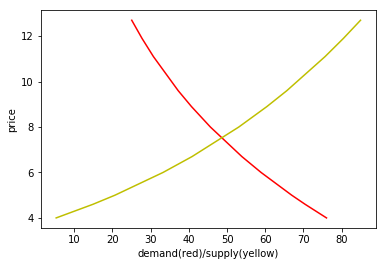

In [14]:
plt.plot(demand_fun(price), price, 'r-')
plt.plot(supply_fun(price), price, 'y-')
plt.xlabel('demand(red)/supply(yellow)')
plt.ylabel('price')

Знайдемо точку перетину фукцій з заданою точністю.

Точка ринкової рівноваги(P*, Q*):  [  7.502011  48.643873]


Text(0,0.5,'price')

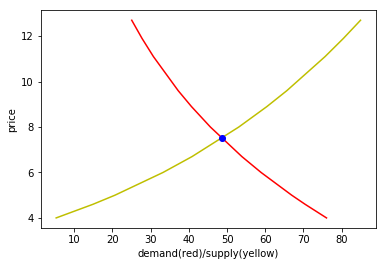

In [15]:
epsilon = 1.0e-06
start_P = 6.0
end_P = 10.0
while end_P - start_P > epsilon:
    middle = (start_P + end_P) / 2
    if supply_fun(middle) > demand_fun(middle): 
        end_P = middle
    else:
        start_P = middle
print("Точка ринкової рівноваги(P*, Q*): ",np.around([start_P, supply_fun(start_P)], decimals = 6))
plt.plot(demand_fun(price), price, 'r-')
plt.plot(supply_fun(price), price, 'y-')
plt.plot(supply_fun(start_P), start_P, 'bo')

balance_q = supply_fun(start_P)
balance_price = start_P

plt.xlabel('demand(red)/supply(yellow)')
plt.ylabel('price')

Еластичність попиту:$$ \frac{dQ}{dP} : \frac{Q}{P} $$


In [16]:
def e_demand(x):
    return (0.3823 * x - 12.142) / (0.3823 * x - 12.142 + 118.217 / x)

In [17]:
def e_supply(x):
    return (-0.35775 * x + 14.95) / (-0.35775 * x + 14.95 - 45.3753 / x)

In [18]:
print(balance_price)
print(e_demand(balance_price))
print(e_supply(balance_price))

7.502011299133301
-1.4302738572462552
1.9727683091055885


$$ |e_{demand}(P*)| < |e_{supply}(P*)|$$ , отже рівновага ринку не є стабільною.

## 3. Визначення дугової еластичності на всьому діапазоні вимірювань

$$ E{p} = \frac{Q_2 - Q_1}{P_2 - P_1} : \frac{\frac{\sum\limits_{i=1}^n Q}{n}}{\frac{\sum\limits_{i=1}^n P}{n}} = \frac{Q_2 - Q_1}{P_2 - P_1} : \frac{\sum\limits_{i=1}^n Q}{\sum\limits_{i=1}^n P} $$

In [19]:
def e_p (q, p):
    return ((q[-1] - q[1])/(p[-1] - p[1])) / (sum(q)/sum(p)) 

In [20]:
print("Дугова еластичність попиту: " + str(e_p(demand, price)))
print("Дугова еластичність пропозиції: " + str(e_p(supply, price)))

Дугова еластичність попиту: -1.0098390479
Дугова еластичність пропозиції: 1.63623993258


## 4. Вплив субсидії на криві попиту та пропозиції

З метою соціального захисту малозабезпечених верств населення держава може надавати субсидії до цін та тарифів на товари та послуги першої необхідності. Отже попит на доступні товари зросте, щр в свою чергу призведе до збільшення ціни. На графіку це виглядатиме наступним чином:

Text(0,0.5,'price')

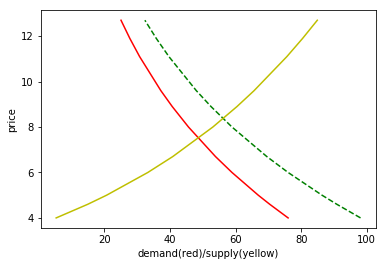

In [21]:
new_price = np.copy(price)
for i in range(len(price)):
    new_price[i] -= 2
plt.plot(demand_fun(price), price, 'r-')
plt.plot(demand_fun(new_price), price, 'g--')
plt.plot(supply_fun(price), price, 'y-')
plt.xlabel('demand(red)/supply(yellow)')
plt.ylabel('price')